# TP N° 4 - Régression linéaire

## 1. Analyse exploratoire de données

### 1.1 Importations des librairies et chargement des données

1. Importer toutes les librairies Python nécessaires pour le développement de vos modèles de prédiction.

In [2]:
import sys

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN 
import seaborn as sns
# sns.set_context("poster")
# sns.set_style("ticks")

# SCHIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Standardisation des variables numériques
from sklearn.preprocessing import MinMaxScaler # Normalisation MinMax
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer  # Imputation 


# SCHIKIT-LEARN: MODELES
## Référence: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

from sklearn import linear_model # Classe Modèle linéaire 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge # Régression 
from sklearn.linear_model import Lasso # Régression Lasso
from sklearn.linear_model import ElasticNet # Régression Elastic Net
from sklearn.svm import SVR ## SVM pour la régression 
from sklearn.neighbors import NearestNeighbors # KNN

from sklearn.linear_model import SGDRegressor # Régression pénalisée avec un algorithme stochastique (SGD)


# SCHIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # 
from sklearn.model_selection import cross_val_score # Validation croisée pour comparaison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation: visualiser les scores lors du choix d'un hyperparamétre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyperparamètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage: visualisation des scores du train et du validation sets en fonction des quantités des données
 
## EVALUATION

from sklearn.metrics import r2_score # Coefficient R2
from sklearn.metrics import mean_absolute_error #  MAE
from sklearn.metrics import mean_squared_error  # RMSE
from sklearn.metrics import median_absolute_error # Erreur de la médiane absolue

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEUR
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

2. Charger les données et les enregistrer dans une structure de données dataframe de Pandas

In [3]:
data_test = pd.read_csv('Data/ames_prices_test.csv', index_col=0)
data_train = pd.read_csv('Data/ames_prices_train.csv', index_col=0)

df_test = data_test.copy()
df_train = data_train.copy()

# Afficher les 5 premières lignes du dataframe
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Décrire succinctement les variables (on pourra lire et afficher le texte de la description à l’aide de la méthode open.

In [4]:
with open('Data/ames_prices_description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

4. Quelles sont les dimensions de votre dataframe ?

In [5]:
print("Dimensions du dataframe train : ", df_train.shape)
print("Dimensions du dataframe test : ", df_test.shape)

Dimensions du dataframe train :  (1460, 80)
Dimensions du dataframe test :  (1459, 79)


5. Indiquer le type de chacune des variables.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

6. Préciser la variable d’intérêt (variable dépendante) et les variables explicatives (variables indépendantes).

La variable d’intérêt est la variable SalePrice.
Les variables explicatives sont toutes les autres variables du dataframe.

7. Visualiser la distribution de la variable cible. Interpréter.

<Axes: xlabel='SalePrice', ylabel='Density'>

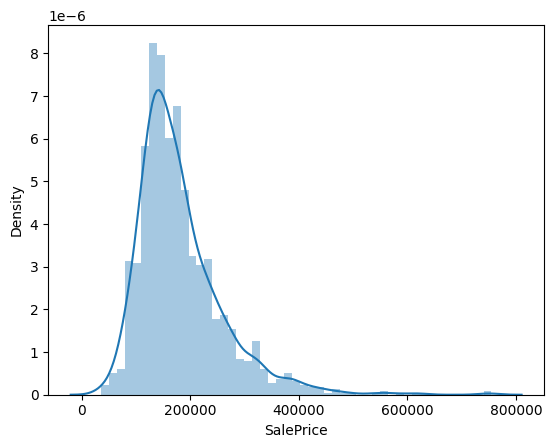

In [7]:
sns.distplot(df_train['SalePrice'])

## 1.2 Analyse univariée

1. Représenter la variable SalePrice à l’aide de l’histogramme de fréquence et regarder si elle
semble s’ajuster à une distribution normale.

<Axes: xlabel='SalePrice', ylabel='Density'>

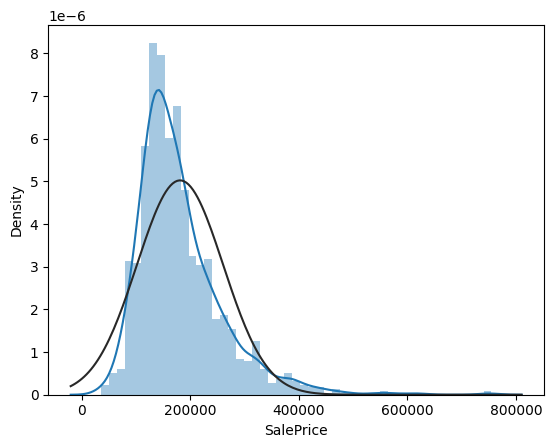

In [8]:
sns.distplot(df_train['SalePrice'], fit=norm)

2. La loi normale est caractérisée par un coefficient d’asymétrie et un coefficient d’aplatissement nuls. Ces indicateurs peuvent donc également nous donner une idée. Calculer les coefficients d’asymétrie et d’aplatissement de la variable cible. Interpréter.

In [9]:
print("Coefficient d'asymétrie : ", df_train['SalePrice'].skew())
print("Coefficient d'aplatissement : ", df_train['SalePrice'].kurtosis())

Coefficient d'asymétrie :  1.8828757597682129
Coefficient d'aplatissement :  6.536281860064529


3. Le diagramme Quantile-Quantile” ou “diagramme Q-Q” ou “Q-Q plot” (stats.probplot) est un outil graphique permettant d’évaluer la pertinence de l’ajustement d’une distribution donnée à un modèle théorique. Si la série statistique suit bien la distribution théorique choisir (gaussienne), on devrait  voir les quantiles observés égaux aux quantiles associés au modèle théorique. Tracer le digramme Q-Q plot par rapport à la loi normale. Interpréter.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

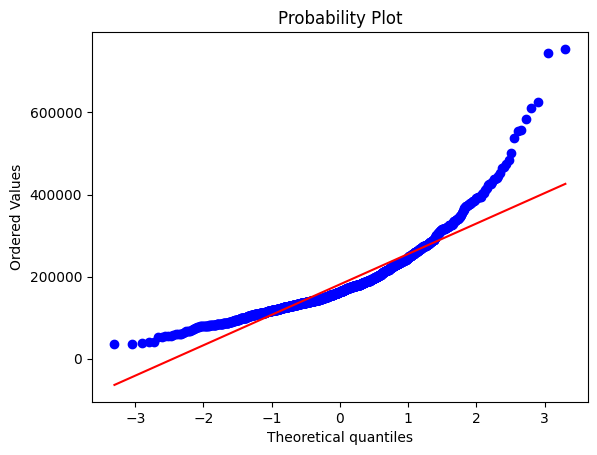

In [10]:
stats.probplot(df_train['SalePrice'], plot=plt)

# 2. Pré-traitement des données

1. On rappelle que le processus du pré-traitement de données se fait conjointement sur les données train et test. Il serait intéressant de concaténer ces deux données en un seul dataframe pour pouvoir appliquer en une seule fois les éventuelles stratégies de pré-traitement.

In [11]:
df_concat = pd.concat([df_train, df_test], axis=0, sort=False)

2. A l’aide de la fonction heatmap de Pandas, visualiser les valeurs manquantes des variables, si elles existent.

<Axes: ylabel='Id'>

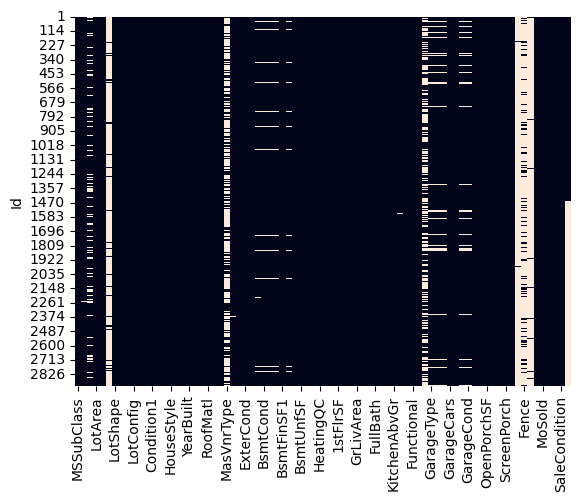

In [12]:
sns.heatmap(df_concat.isnull(), cbar=False)

3. Calculez les pourcentages des valeurs manquantes de chaque variable. Il est préférable d’ordonner ces pourcentages.

In [13]:
df_concat.isnull().sum().sort_values(ascending=False) / len(df_concat) * 100

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
MasVnrType       60.500171
SalePrice        49.982871
FireplaceQu      48.646797
LotFrontage      16.649538
GarageFinish      5.447071
GarageQual        5.447071
GarageCond        5.447071
GarageYrBlt       5.447071
GarageType        5.378554
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrArea        0.787941
MSZoning          0.137033
BsmtHalfBath      0.068517
Utilities         0.068517
BsmtFullBath      0.068517
Functional        0.068517
Exterior2nd       0.034258
Exterior1st       0.034258
GarageArea        0.034258
GarageCars        0.034258
SaleType          0.034258
KitchenQual       0.034258
BsmtFinSF1        0.034258
Electrical        0.034258
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
S

4. Traiter les valeurs manquantes. Quelle stratégie adoptez-vous ?